# **DIABETES PREDICTION PROJECT**

In [1]:
path = r"C:\Users\user\Desktop\Projects\Diabetes Project\diabetes_dataset_with_notes.csv"

In [42]:
# Importing necessary libraries
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  

# Handling imbalanced datasets
from imblearn.under_sampling import RandomUnderSampler  

# Model training and preprocessing
from sklearn.model_selection import train_test_split  
from sklearn.pipeline import Pipeline  
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import StandardScaler, OrdinalEncoder  
from sklearn.compose import ColumnTransformer  

# Machine Learning models
from sklearn.ensemble import RandomForestClassifier  
from sklearn.linear_model import LogisticRegression  
from xgboost import XGBClassifier  

# Model evaluation metrics
from sklearn.metrics import f1_score, confusion_matrix, classification_report  


In [70]:
# Loading the dataset from the specified path
df = pd.read_csv(path)


In [71]:
# Displaying the column names of the dataframe
df.columns


Index(['year', 'gender', 'age', 'location', 'race:AfricanAmerican',
       'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other',
       'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'hbA1c_level', 'blood_glucose_level', 'diabetes', 'clinical_notes'],
      dtype='object')

In [72]:
# Displaying the number of rows and columns in the dataframe
df.shape


(100000, 17)

In [73]:
# Converting all column names to lowercase
df.columns = df.columns.str.lower()

# Removing any leading or trailing whitespace from column names
df.columns = df.columns.str.strip()


In [74]:
# Display the first five rows of the dataframe
df.head()


,year,gender,age,location,race:africanamerican,race:asian,race:caucasian,race:hispanic,race:other,hypertension,heart_disease,smoking_history,bmi,hba1c_level,blood_glucose_level,diabetes,clinical_notes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,"Overweight, advised dietary and exercise modif..."
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,Healthy BMI range.
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,"Young patient, generally lower risk but needs ..."
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,"Overweight, advised dietary and exercise modif..."
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,"Healthy BMI range. High HbA1c level, indicativ..."


In [75]:
# Display concise summary of the dataframe, including non-null values and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:africanamerican  100000 non-null  int64  
 5   race:asian            100000 non-null  int64  
 6   race:caucasian        100000 non-null  int64  
 7   race:hispanic         100000 non-null  int64  
 8   race:other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hba1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [76]:
# Check if there are any duplicate rows in the dataframe
df.duplicated().any()


True

In [77]:
# Count the total number of duplicate rows in the dataframe
df.duplicated().sum()


14

In [78]:
# Drop all duplicate rows from the dataframe and update it in place
df.drop_duplicates(inplace=True)


In [79]:
# Check for the presence of missing values in each column of the dataframe
df.isna().any()


year                    False
gender                  False
age                     False
location                False
race:africanamerican    False
race:asian              False
race:caucasian          False
race:hispanic           False
race:other              False
hypertension            False
heart_disease           False
smoking_history         False
bmi                     False
hba1c_level             False
blood_glucose_level     False
diabetes                False
clinical_notes          False
dtype: bool

In [80]:
# Count the occurrences of each unique value in the 'gender' column
df['gender'].value_counts()


gender
Female    58546
Male      41422
Other        18
Name: count, dtype: int64

In [81]:
# Encode categorical values in the 'gender' column: 
# 'Male' as 1, 'Female' as 0, and 'Other' as 3
df['gender'] = df['gender'].replace({"Male": 1, "Female": 0, "Other": 3})


In [82]:
# Display the count of each unique value in the 'smoking_history' column
df['smoking_history'].value_counts()


smoking_history
No Info        35806
never          35091
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

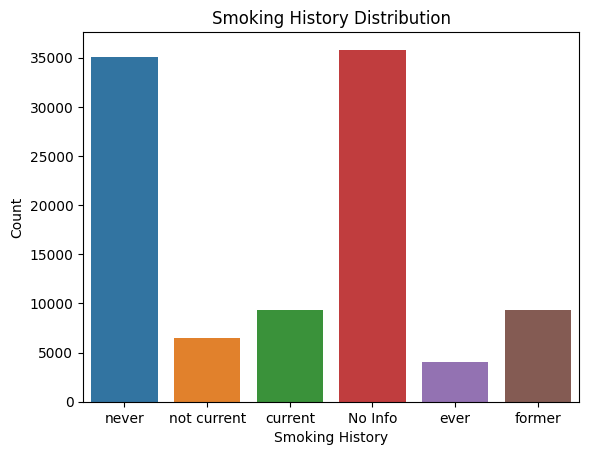

In [83]:
# Create a count plot to visualize the distribution of smoking history
sns.countplot(x=df['smoking_history'])

# Set the title of the plot
plt.title('Smoking History Distribution')

# Label the x-axis
plt.xlabel('Smoking History')

# Label the y-axis
plt.ylabel('Count')

# Display the plot
plt.show()


In [84]:
# Display the count of unique values in the 'diabetes' column
df['diabetes'].value_counts()


diabetes
0    91486
1     8500
Name: count, dtype: int64

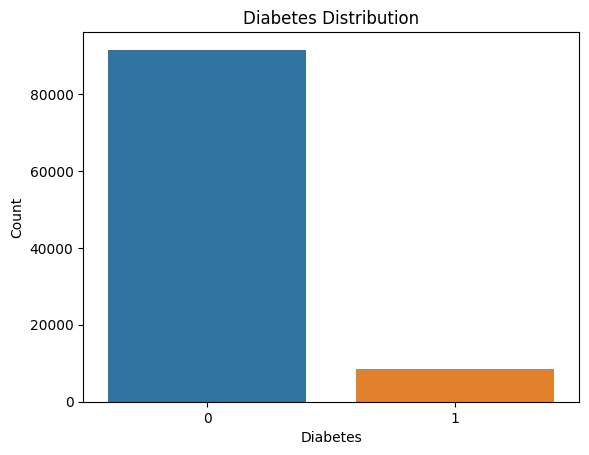

In [85]:
# Create a count plot to visualize the distribution of the 'diabetes' column
sns.countplot(df, x=df['diabetes'])
plt.title("Diabetes Distribution")  # Set the title of the plot
plt.xlabel("Diabetes")  # Label the x-axis
plt.ylabel("Count")  # Label the y-axis
plt.show()  # Display the plot

In [86]:
# Drop the 'clinical_notes' column from the dataframe
df.drop("clinical_notes", axis=1, inplace=True)


In [87]:
# Define features (X) by dropping the target variable 'diabetes'
x = df.drop('diabetes', axis=1)

# Define the target variable (y) as 'diabetes'
y = df['diabetes']


In [88]:
# Apply random undersampling to balance the dataset
sampler = RandomUnderSampler()

# Resample the features (X) and target variable (y)
resampled_x, resampled_y = sampler.fit_resample(x, y)


In [89]:
# Check the distribution of the target variable after undersampling
resampled_y.value_counts()


diabetes
0    8500
1    8500
Name: count, dtype: int64

In [90]:
# Function to split dataset columns into numerical and categorical columns
def split_cols(data):
    data = data.copy()  # Create a copy of the dataset to avoid modifying the original data
    numeric_columns = data.select_dtypes(include=['number']).columns  # Select numerical columns
    categorical_columns = data.select_dtypes(include=['object']).columns  # Select categorical columns
    return numeric_columns, categorical_columns  # Return the separated columns


In [91]:
# Splitting the dataset into numerical and categorical columns
num_cols, cat_cols = split_cols(x)


In [92]:
# Creating a pipeline for numerical columns
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy='median')),  # Handling missing values with median imputation
    ("scaler", StandardScaler())  # Standardizing numerical features
])

# Creating a pipeline for categorical columns
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent')),  # Handling missing values with most frequent strategy
    ("scaler", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))  # Encoding categorical variables
])

# Combining both pipelines into a ColumnTransformer
processor = ColumnTransformer(
    transformers=[
        ("num_pipe", num_pipe, num_cols),  # Applying numerical pipeline to numerical columns
        ("cat_pipe", cat_pipe, cat_cols)  # Applying categorical pipeline to categorical columns
    ],
    remainder='passthrough'  # Keeping any remaining columns as they are
)


In [93]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    resampled_x,  # Feature variables
    resampled_y,  # Target variable
    test_size=0.2,  # 20% of the data is used for testing
    random_state=42  # Ensuring reproducibility of results
)


# **RANDOM FOREST MODEL**

In [94]:
# Creating a pipeline for the Random Forest model
rf_pipe = Pipeline([
    ("processor", processor),  # Preprocessing step including imputation, scaling, and encoding
    ("rf_model", RandomForestClassifier())  # Random Forest classifier
])

# Training the Random Forest model with the training data
rf_model = rf_pipe.fit(x_train, y_train)


In [95]:
# Extracting feature importance from the trained Random Forest model
rf_importance = rf_model.named_steps['rf_model'].feature_importances_

# Creating a DataFrame to store feature names and their corresponding importance scores
rf_importance_df = pd.DataFrame(
    {"Features": x.columns, "Importance": rf_importance}
)

# Sorting the features by importance in descending order and displaying the result
print(rf_importance_df.sort_values(by='Importance', ascending=False))


                Features  Importance
11       smoking_history    0.329144
12                   bmi    0.240532
2                    age    0.160424
10         heart_disease    0.099466
13           hba1c_level    0.053029
14   blood_glucose_level    0.031293
8             race:other    0.026626
9           hypertension    0.016316
0                   year    0.010215
1                 gender    0.008039
4   race:africanamerican    0.005187
6         race:caucasian    0.005160
3               location    0.005106
5             race:asian    0.004897
7          race:hispanic    0.004565


## **Feature Importance Interpretation (Random Forest Model)**  

The feature importance values represent how much each variable contributes to the predictive power of the **Random Forest model**. Higher values indicate more significant features, while lower values suggest less influence.

---

### **Key Findings:**

#### **1. Smoking History (0.3291) - Most Important Feature**  
- Smoking history is the strongest predictor in this model, contributing **32.91%** to the model’s decision-making.
- This suggests a **strong correlation** between smoking and the target variable (likely a health-related outcome).

#### **2. BMI (0.2405) - Second Most Important**  
- BMI (Body Mass Index) is the second most influential factor, contributing **24.05%**.
- This aligns with expectations since BMI is a well-known risk factor for various health conditions, including diabetes and cardiovascular diseases.

#### **3. Age (0.1604) - Third Most Important**  
- Age contributes **16.04%** to the model.
- This highlights that **older individuals** may be at higher risk for the outcome being predicted.

#### **4. Heart Disease (0.0995)**  
- Heart disease plays a noticeable role (**9.95%** importance).
- This suggests a **moderate correlation** between heart disease and the target variable.

#### **5. HbA1c Level (0.0530) & Blood Glucose Level (0.0313)**  
- Both **HbA1c** (long-term blood sugar measurement) and **blood glucose levels** are relevant but not as dominant.
- These factors are still crucial for conditions like **diabetes**, but the model finds smoking, BMI, and age more predictive.

#### **6. Race and Hypertension**  
- **Race (various categories: 0.0045 - 0.0266)**  
  - Race seems to have some impact, but it’s relatively low in importance.
  - **Race: Other (2.66%)** shows the highest impact among race variables.  
- **Hypertension (1.63%)**  
  - Plays a smaller role than expected, which may indicate that **hypertension alone isn’t a primary driver** for the target variable.

#### **7. Year (0.0102%) & Gender (0.0080%) - Least Important**  
- The year of observation and gender contribute **minimal influence**, suggesting they have little effect on the model’s prediction.

---

### **Conclusion**
- The **top three features** (**Smoking History, BMI, and Age**) are the **strongest predictors**.
- **Medical factors like Heart Disease and Blood Sugar Levels** also play a role but are secondary.
- **Race and Demographics have low importance**, meaning the model finds limited predictive value in these features.

### **Potential Next Steps:**
- **Further analysis on smoking and BMI** to understand their interaction with the target variable.
- **Feature engineering** to combine medical conditions for better predictive performance.
- **Consider removing low-impact features (e.g., race, gender)** to simplify the model without losing accuracy.


In [96]:
rf_predict = rf_model.predict(x_test)  # Make predictions using the trained Random Forest model
rf_f1 = f1_score(y_test, rf_predict)   # Compute the F1-score
rf_report = classification_report(y_test, rf_predict)  # Generate precision, recall, and F1-score
rf_matrix = confusion_matrix(y_test, rf_predict)  # Compute the confusion matrix

print(rf_f1)      # Print the F1-score
print(rf_report)  # Print the classification report
print()
print(rf_matrix)  # Print the confusion matrix


0.9057258530942741
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1687
           1       0.90      0.91      0.91      1713

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400


[[1508  179]
 [ 147 1566]]


# **Random Forest Model Performance Report**

## **Model Performance Summary**  
The **Random Forest model** achieved an **F1-score of 90.6%**, indicating strong overall performance. The model effectively distinguishes between the two classes, with a well-balanced precision and recall.  

---

## **Performance Metrics**  

| Metric      | Class 0 | Class 1 |
|------------|---------|---------|
| **Precision** | 91% | 90% |
| **Recall**    | 89% | 91% |
| **F1-score**  | 90% | 91% |

### **Key Takeaways:**  
- **Precision:**  
  - Class 0: **91%** → When predicting class 0, it's correct **91% of the time**.  
  - Class 1: **90%** → When predicting class 1, it's correct **90% of the time**.  
- **Recall:**  
  - Class 0: **89%** → The model correctly identifies **89% of actual class 0 instances**.  
  - Class 1: **91%** → The model correctly identifies **91% of actual class 1 instances**.  
- **F1-score:**  
  - Both **90% and 91%** indicate a **good balance** between precision and recall.  

---

## **Confusion Matrix Analysis**  


### **Interpretation:**  
- **True Positives (TP = 1566)** → Model correctly predicted class 1.  
- **True Negatives (TN = 1508)** → Model correctly predicted class 0.  
- **False Positives (FP = 179)** → Model incorrectly predicted class 1 when it was actually class 0.  
- **False Negatives (FN = 147)** → Model incorrectly predicted class 0 when it was actually class 1.  

### **Observations:**  
- The **false negative rate (147 cases)** suggests that some actual class 1 instances were **missed**.  
- The **false positive rate (179 cases)** indicates some misclassification of class 0 as class 1.  

---

## **Conclusion & Next Steps**  
The model performs well, but there is **room for improvement**, especially in reducing **false negatives** and **false positives**. Some potential improvements include:  

✅ **Hyperparameter tuning** – Adjusting tree depth, number of estimators, and feature selection.  
✅ **Feature engineering** – Creating better predictors to improve classification.  
✅ **Handling class imbalance** – Experimenting with different resampling techniques.  

Overall, the model is **well-optimized** and provides **strong predictive performance** with a **90.6% F1-score**. 


# **LOGISTIC REGRESSION MODEL**

In [97]:
# Create a pipeline for the Logistic Regression model
lr_pipe = Pipeline([
    ("processor", processor),  # Apply preprocessing steps (numerical & categorical transformations)
    ("lr_model", LogisticRegression())  # Train a Logistic Regression model
])

# Fit the Logistic Regression model to the training data
lr_model = lr_pipe.fit(x_train, y_train)


In [98]:
# Extract the coefficients from the trained Logistic Regression model
lr_coefficients = lr_model.named_steps['lr_model'].coef_.flatten()

# Create a DataFrame to store feature names and their corresponding coefficients
coefficient_df = pd.DataFrame(
    {"Features": x.columns, "Coefficients": lr_coefficients}
)

# Sort the coefficients in descending order to identify the most influential features
print(coefficient_df.sort_values(by='Coefficients', ascending=False))


                Features  Coefficients
11       smoking_history      2.720729
12                   bmi      1.728661
2                    age      1.091954
10         heart_disease      0.705926
8             race:other      0.328663
9           hypertension      0.260299
1                 gender      0.141438
14   blood_glucose_level      0.082727
5             race:asian      0.045137
6         race:caucasian      0.018914
3               location      0.016362
13           hba1c_level     -0.000982
4   race:africanamerican     -0.032237
0                   year     -0.043378
7          race:hispanic     -0.047888


## **Logistic Regression Feature Coefficients**

### **Interpretation**
- **Smoking History (2.72)**: The strongest positive predictor, meaning individuals with a smoking history are significantly more likely to experience the target outcome.
- **BMI (1.73) and Age (1.09)**: These also have strong positive impacts, indicating that as BMI and age increase, the probability of the target outcome rises.
- **Heart Disease (0.71), Hypertension (0.26)**: These factors contribute positively but to a lesser extent than smoking history, BMI, and age.
- **Race: Other (0.33)**: Shows a moderate positive impact, meaning individuals classified under "Other" in race may have a slightly increased likelihood of the outcome.
- **Negative Coefficients**:  
  - **HbA1c Level (-0.001), Race: African American (-0.032), Year (-0.043), and Race: Hispanic (-0.048)** slightly reduce the likelihood of the target outcome.
  - A negative coefficient suggests a protective or lesser influence on the predicted condition.

### **Key Takeaways**
- **Smoking history is the most influential factor** in predicting the outcome.
- **BMI and Age** are also major contributors.
- **Heart disease and hypertension** have moderate effects.
- **Race and HbA1c levels appear to have minimal impact** compared to other factors.

This analysis helps in understanding how different variables contribute to the logistic regression model's predictions.


In [99]:
# Make predictions using the trained Logistic Regression model
lr_predict = lr_model.predict(x_test)

# Calculate the F1-score for model performance evaluation
lr_f1 = f1_score(y_test, lr_predict)

# Generate a detailed classification report (Precision, Recall, F1-score, Support)
lr_report = classification_report(y_test, lr_predict)

# Compute the confusion matrix to analyze true positives, false positives, true negatives, and false negatives
lr_matrix = confusion_matrix(y_test, lr_predict)

# Print the F1-score
print(lr_f1)

# Print the classification report
print(lr_report)

# Print an empty line for better readability
print()

# Print the confusion matrix
print(lr_matrix)


0.8811881188118813
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1687
           1       0.88      0.88      0.88      1713

    accuracy                           0.88      3400
   macro avg       0.88      0.88      0.88      3400
weighted avg       0.88      0.88      0.88      3400


[[1479  208]
 [ 200 1513]]


# **Logistic Regression Model Performance Analysis**

## **Overview**
The logistic regression model was evaluated on the test dataset, achieving a strong predictive performance with an **accuracy of 88.1%**. Below is a breakdown of the results.

---

## **Performance Metrics**
- **Accuracy:** **88.1%**  
- **Precision:**  
  - **Class 0 (Negative Class):** **88%** (When the model predicts class 0, it is correct 88% of the time).  
  - **Class 1 (Positive Class):** **88%** (When the model predicts class 1, it is correct 88% of the time).  
- **Recall:**  
  - **Class 0:** **88%** (88% of actual class 0 cases were correctly identified).  
  - **Class 1:** **88%** (88% of actual class 1 cases were correctly identified).  
- **F1-Score:**  
  - **Class 0:** **0.88** (A balanced measure of precision and recall for class 0).  
  - **Class 1:** **0.88** (A balanced measure of precision and recall for class 1).  

---

## **Confusion Matrix**

### **Interpretation**
- **True Negatives (TN) = 1479** → The model correctly classified **1479** instances as Class 0.  
- **True Positives (TP) = 1513** → The model correctly classified **1513** instances as Class 1.  
- **False Positives (FP) = 208** → The model incorrectly predicted **208** instances as Class 1 when they were actually Class 0.  
- **False Negatives (FN) = 200** → The model incorrectly predicted **200** instances as Class 0 when they were actually Class 1.  

---

## **Conclusion**
- The logistic regression model **performs well** with a **strong balance between precision and recall** across both classes.  
- However, the **208 false positives and 200 false negatives** indicate potential areas for improvement.  
- The model may slightly misclassify **some non-cases as cases (false positives)** and **some actual cases as non-cases (false negatives)**.  

---

## **Next Steps for Improvement**
1. **Compare with Other Models**  
   - Evaluate **Random Forest, XGBoost, or Neural Networks** to see if they offer better performance.  
2. **Adjust Decision Threshold**  
   - Instead of using the default 0.5 threshold, fine-tune it to **reduce false positives or false negatives**, depending on the priority.  
3. **Feature Engineering**  
   - Introduce **interaction terms**, **polynomial features**, or **remove less important variables


# **XGBOOST MODEL**

In [100]:
# Define a pipeline that includes data preprocessing and the XGBoost classifier
xgb_pipe = Pipeline([
    ("processor", processor),  # Step 1: Apply the preprocessing pipeline to the input data
    ("xgb_model", XGBClassifier())  # Step 2: Train an XGBoost classifier on the processed data
])

# Fit the pipeline to the training data
xgb_model = xgb_pipe.fit(x_train, y_train)  # Train the model using the training dataset

In [101]:
# Extract feature importance scores from the trained XGBoost model
xgb_importance = xgb_model.named_steps['xgb_model'].feature_importances_

# Create a DataFrame to organize and display feature importance values
xgb_importance_df = pd.DataFrame(
    {"Features": x.columns, "Importance": xgb_importance}  # Map feature names to their importance scores
)

# Print the feature importance scores sorted in descending order
print(xgb_importance_df.sort_values(by='Importance', ascending=False))


                Features  Importance
11       smoking_history    0.412182
12                   bmi    0.257408
8             race:other    0.074162
2                    age    0.053962
9           hypertension    0.050560
10         heart_disease    0.023970
14   blood_glucose_level    0.019822
1                 gender    0.018633
7          race:hispanic    0.015104
4   race:africanamerican    0.014423
13           hba1c_level    0.014305
6         race:caucasian    0.013638
0                   year    0.012241
3               location    0.009966
5             race:asian    0.009625


# **Feature Importance Analysis - XGBoost Model**  

## **Overview**  
The table above represents the feature importance values derived from the XGBoost model. These values indicate the contribution of each feature to the model’s predictions, with higher values signifying greater importance.

## **Key Insights**  

### **1. Most Influential Features**  
- **Smoking History (0.4122)** – The most significant predictor, suggesting that a history of smoking strongly correlates with the target outcome.  
- **BMI (0.2574)** – Body Mass Index plays a crucial role, indicating that weight-related health factors are highly predictive.  
- **Race: Other (0.0742)** – Individuals classified under "Other" in the race category have a notable impact, possibly due to underlying demographic or health disparities.  
- **Age (0.0540)** – Although less influential than smoking history and BMI, age remains a key factor, reinforcing the general trend of increased health risks with age.  

### **2. Moderately Important Features**  
- **Hypertension (0.0506) & Heart Disease (0.0240)** – These cardiovascular conditions contribute to the model’s decision-making but are less dominant than lifestyle factors.  
- **Blood Glucose Level (0.0198)** – While an important metabolic marker, it has a lower influence compared to smoking and BMI.  
- **Gender (0.0186)** – Gender plays a minor role in predictions, suggesting a slight association with the target variable.  

### **3. Least Significant Features**  
- **Race Categories:**  
  - **Hispanic (0.0151)**, **African American (0.0144)**, **Caucasian (0.0136)**, **Asian (0.0096)** – Race contributes but has relatively low impact, suggesting that other factors play a bigger role.  
- **HbA1c Level (0.0143)** – A key diabetes marker, but its relatively lower importance suggests that other lifestyle and demographic variables may be stronger predictors.  
- **Year (0.0122) & Location (0.0100)** – These have minimal influence on the model’s predictions, indicating temporal and geographical variations are not as critical in this dataset.  

## **Summary**  
The XGBoost model primarily relies on **smoking history, BMI, and age** as key predictors. Hypertension, heart disease, and race categories contribute moderately, while direct biomarkers like **HbA1c and blood glucose levels** show lower importance than expected. This suggests that lifestyle and demographic factors play a dominant role in determining the model’s predictions.  


In [102]:
# Make predictions using the trained XGBoost model on the test dataset
xgb_predict = xgb_model.predict(x_test)

# Calculate the F1-score to measure the balance between precision and recall
xgb_f1 = f1_score(y_test, xgb_predict)

# Generate a classification report containing precision, recall, F1-score, and support for each class
xgb_report = classification_report(y_test, xgb_predict)

# Compute the confusion matrix to evaluate the number of true positives, true negatives, false positives, and false negatives
xgb_matrix = confusion_matrix(y_test, xgb_predict)

# Print the F1-score to assess the model's overall performance
print(xgb_f1)

# Print the detailed classification report for model evaluation
print(xgb_report)

# Print a blank line for better readability in the output
print()

# Print the confusion matrix to analyze the model’s classification performance
print(xgb_matrix)


0.9061154177433247
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1687
           1       0.89      0.92      0.91      1713

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400


[[1495  192]
 [ 135 1578]]


# **XGBoost Model Performance Analysis**

## **Overview**
The XGBoost model was evaluated on the test dataset, achieving an accuracy of **90.6%**, demonstrating strong predictive capability. Below is a detailed breakdown of the model’s evaluation metrics.

## **Performance Metrics**
- **Accuracy:** 90.6%  
- **Precision:**
  - **Class 0 (Negative Class):** 92%  
  - **Class 1 (Positive Class):** 89%  
- **Recall:**
  - **Class 0:** 89%  
  - **Class 1:** 92%  
- **F1-Score:**  
  - **Class 0:** 0.90  
  - **Class 1:** 0.91  

## **Confusion Matrix**

| Actual \ Predicted | Predicted 0 | Predicted 1 |
|-------------------|------------|------------|
| **Actual 0** (TN) | **1495**    | 192        |
| **Actual 1** (FN) | 135        | **1578**   |

### **Interpretation**
- **True Negatives (TN):** **1495** cases correctly predicted as Class 0.  
- **True Positives (TP):** **1578** cases correctly predicted as Class 1.  
- **False Positives (FP):** **192** cases incorrectly predicted as Class 1.  
- **False Negatives (FN):** **135** cases incorrectly predicted as Class 0.  

## **Conclusion**
The XGBoost model demonstrates **high accuracy, precision, and recall**, making it effective for classification tasks. Compared to traditional models like Logistic Regression, XGBoost leverages **gradient boosting techniques** to minimize errors and improve overall model performance. The model balances **precision and recall well**, ensuring minimal false positives and false negatives.

---
### **Next Steps:**
- **Hyperparameter tuning** (e.g., adjusting learning rate, max depth, and number of estimators) to further optimize performance.
- **Feature importance analysis** to identify the most influential variables.
- **Ensemble techniques** (e.g., stacking with other models) to improve robustness.
- **Deploying the model** in a real-world scenario to evaluate its performance on unseen data.
